In [11]:
from pyaec import Aec
import soundfile as sf
import sys
import numpy as np

In [3]:
rec_path = "nearend_mic_fileid_0.wav"
echo_path = "farend_speech_fileid_0.wav"
out_path = "out_pyaec.wav"

frame_size = 160
filter_length = 1600
sample_rate = 16000
aec = Aec(frame_size, filter_length, sample_rate, True)

In [4]:
rec_samples, _ = sf.read(rec_path, dtype='int16')
echo_samples, _ = sf.read(echo_path, dtype='int16')

num_frames = len(rec_samples)//frame_size
output_frames = []

In [5]:
for i in range(num_frames):
    start = i * frame_size
    end = start + frame_size
    processed_frame = aec.cancel_echo(rec_samples[start:end], echo_samples[start:end])
    output_frames.append(processed_frame)

output = np.concatenate(output_frames, dtype="int16")
sf.write(out_path, output, sample_rate)
print(f"Created {out_path}")

Created out_pyaec.wav


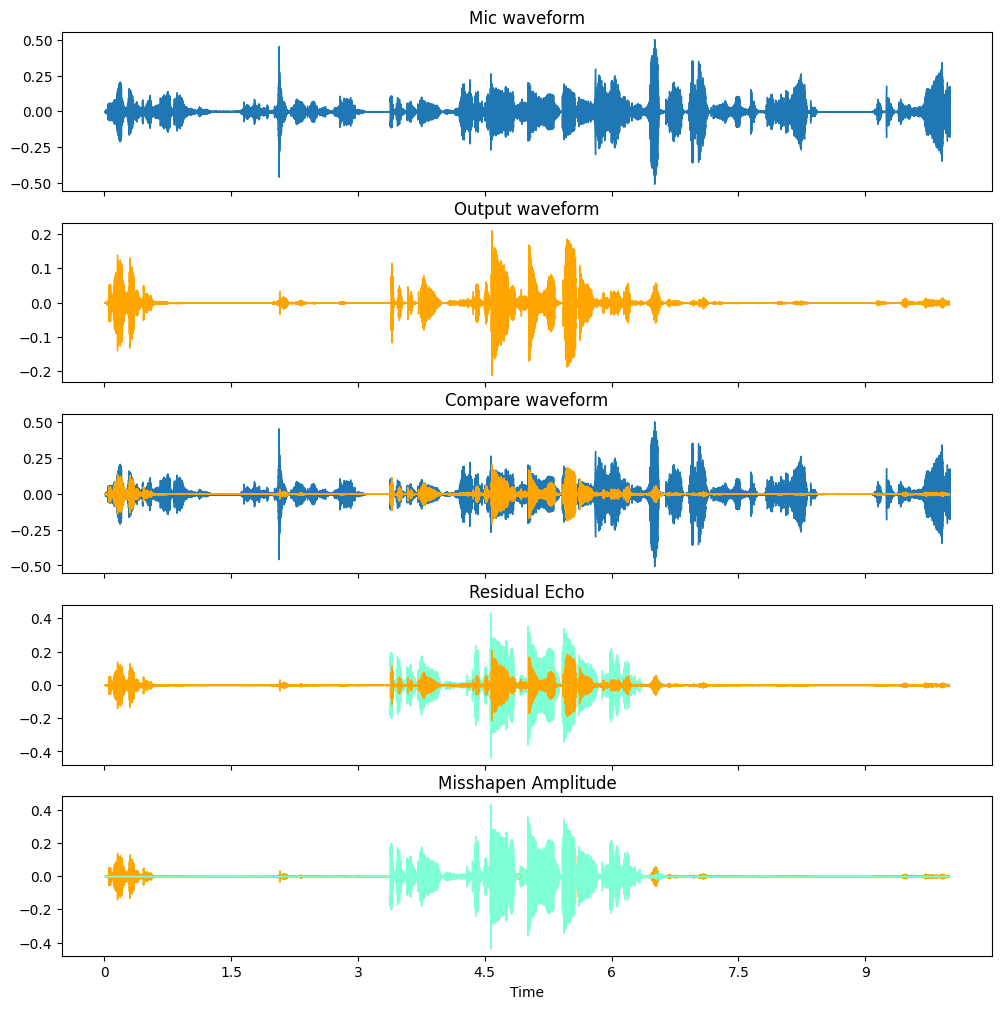

In [22]:
import matplotlib.pyplot as plt
import librosa 

x, sr = librosa.load(rec_path)
y, sr = librosa.load(out_path)
z, sr = librosa.load("nearend_speech_fileid_0.wav")

fig,ax = plt.subplots(nrows = 5, sharex=True, figsize=(12,12))
librosa.display.waveshow(x,sr=sr, ax=ax[0])
ax[0].set(title = 'Mic waveform')
ax[0].label_outer()

librosa.display.waveshow(y, sr=sr, ax=ax[1], color = "orange")
ax[1].set(title = 'Output waveform')
ax[1].label_outer()

librosa.display.waveshow(x, sr=sr, ax=ax[2])
librosa.display.waveshow(y, sr=sr, ax=ax[2], color = "orange")
ax[2].set(title = 'Compare waveform')
ax[2].label_outer()

librosa.display.waveshow(z, sr=sr, ax=ax[3], color = "aquamarine")
librosa.display.waveshow(y, sr=sr, ax=ax[3], color = "orange")
ax[3].set(title = 'Residual Echo')
ax[3].label_outer()

librosa.display.waveshow(y, sr=sr, ax=ax[4], color = "orange")
librosa.display.waveshow(z, sr=sr, ax=ax[4], color = "aquamarine")
ax[4].set(title = 'Misshapen Amplitude')
ax[4].label_outer()

plt.savefig("pyaec.jpg")
plt.show()